In [31]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [32]:
x = np.linspace(0,1.0,9); print x

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]


In [33]:
dx = x[1]-x[0]; print dx

0.125


In [34]:
D = 1.0

In [35]:
dt = dx**2/2/D / 10; print dt
nt = 20 # Number of time steps
t = dt*nt; print t

0.00078125
0.015625


In [36]:
C = (dt * D) / (dx**2); print C # For constants in "propagate" function 

0.05


In [37]:
# Starting f(t,x) as 2-D array of random numbers; pseudo: f[time][x]; n = 0 row stores initial field

f = np.array([[rn.random() for i in range(len(x))] for j in range(int(t/dt)+1)]); print f; # Adding a time row to include intial field

[[ 0.05392914  0.22666741  0.30800572  0.49178353  0.51955763  0.29835996
   0.47820565  0.16208717  0.46908638]
 [ 0.14514823  0.02637548  0.18411264  0.80265911  0.66141333  0.34085663
   0.81145764  0.96679514  0.38704882]
 [ 0.26248718  0.94386823  0.94533913  0.10664932  0.87389019  0.2059957
   0.89842743  0.66799057  0.65657536]
 [ 0.31985155  0.71676845  0.35247973  0.07097257  0.07574499  0.54703207
   0.18731204  0.03444949  0.84878657]
 [ 0.62277637  0.77928199  0.13436422  0.63483484  0.55883313  0.55976201
   0.0592051   0.61560443  0.17778383]
 [ 0.63599798  0.42645309  0.58091571  0.48221995  0.24607612  0.53481733
   0.90477999  0.43653468  0.19480204]
 [ 0.80346667  0.16187612  0.2467026   0.88438347  0.21622484  0.49582623
   0.68114165  0.65404845  0.05927387]
 [ 0.59240793  0.4815079   0.70055754  0.70103005  0.30589684  0.25953631
   0.06818874  0.82456497  0.44397438]
 [ 0.30904444  0.06441548  0.84560278  0.73881284  0.9548995   0.26449331
   0.2360279   0.600053

In [38]:
# Function that iterates diffusion values through number of time steps
def propagate(f, nt, dt):
    # nt = len(f) - 1 # not including initial field in number of time steps
    # print nt
    t_tot = [0.0]
    t = 0.0
    for n in range(0, nt) :
        t += dt
        t_tot.append(t)
        for k in range(0, len(x)):
            f_pre = f[n][k] 
            if k == 0:
                f[n+1][k] = C * ( f[n][len(x)-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hi'

            elif k == (len(x) - 1):
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][0] ) + f_pre
                # print'hello'
            else:
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hey'
                
    return f, t_tot

In [39]:
f, t_tot = propagate(f,nt,dt)
xgrid, tgrid = np.meshgrid(x,t_tot)

%whos

Variable    Type             Data/Info
--------------------------------------
Axes3D      type             <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
C           float64          0.05
D           float            1.0
ax          Axes3DSubplot    Axes(0.125,0.1;0.775x0.8)
dt          float64          0.00078125
dx          float64          0.125
f           ndarray          21x9: 189 elems, type `float64`, 1512 bytes
fig         Figure           Figure(640x480)
i           int              8
j           int              20
np          module           <module 'numpy' from '//a<...>ages/numpy/__init__.pyc'>
nt          int              20
plt         module           <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
propagate   function         <function propagate at 0x117d150c8>
rn          module           <module 'random' from '//<...>ib/python2.7/random.pyc'>
t           float64          0.015625
t_tot       list             n=21
tgrid       ndarray          21x9: 189 elems, 

<IPython.core.display.Javascript object>


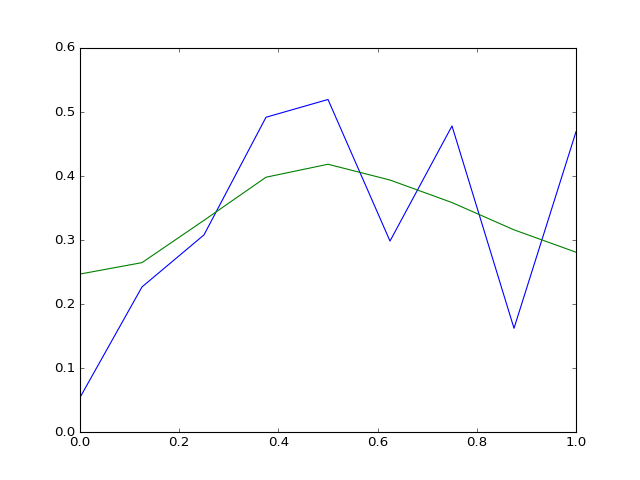

In [40]:
# This graphs first and last
plt.figure()
plt.plot(x,f[0])
plt.plot(x,f[-1])

<IPython.core.display.Javascript object>


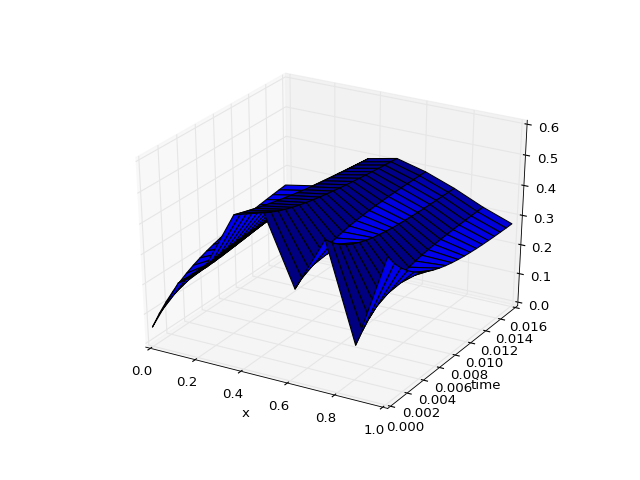

In [43]:
# This plots the solution as a function of time and space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xgrid, tgrid, f, rstride=1,cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('time')